In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('data/self_train.csv')

# Shape & first 5 rows
print(df.shape)
df.head()

(41566, 128)


Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   1               1             D3              10        0.076923   
1   2               1             E1              26        0.076923   
2   3               1             D4              10        0.487179   
3   4               1             D2              26        0.230769   
4   5               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.029851  0.745455  ...   
2               2               3               1  0.164179  0.672727  ...   
3               2               3               1  0.417910  0.654545  ...   
4               3               1               1  0.507463  0.836364  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         8  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

In [3]:
# Prelim information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41566 entries, 0 to 41565
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 40.6+ MB


In [4]:
# Prelim information
df.dtypes

Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 128, dtype: object

In [8]:
# Missing values -- 13 columns will missing values
df.isnull().sum().sort_values(ascending=False).head(15)

Medical_History_10     41179
Medical_History_32     40788
Medical_History_24     38900
Medical_History_15     31211
Family_Hist_5          29279
Family_Hist_3          23894
Family_Hist_2          20140
Insurance_History_5    17829
Family_Hist_4          13425
Employment_Info_6       7546
Medical_History_1       6153
Employment_Info_4       4827
Employment_Info_1         15
Medical_Keyword_13         0
Medical_Keyword_14         0
dtype: int64

In [9]:
# Missing values (ratio out of all rows)
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False).head(15)

Medical_History_10     0.990690
Medical_History_32     0.981283
Medical_History_24     0.935861
Medical_History_15     0.750878
Family_Hist_5          0.704398
Family_Hist_3          0.574845
Family_Hist_2          0.484531
Insurance_History_5    0.428932
Family_Hist_4          0.322980
Employment_Info_6      0.181543
Medical_History_1      0.148030
Employment_Info_4      0.116129
Employment_Info_1      0.000361
Medical_Keyword_13     0.000000
Medical_Keyword_14     0.000000
dtype: float64

### Removing columns with 70% or higher missing values
- should expect 5 less columns 

In [10]:
# Stored all columns with 70% or higher null values
null_ratio = df.isnull().sum()/df.shape[0]
dropping = [i for i in null_ratio.index if null_ratio[i] >= 0.7]

dropping

# Will re-use to drop columns from test dataset

['Family_Hist_5',
 'Medical_History_10',
 'Medical_History_15',
 'Medical_History_24',
 'Medical_History_32']

In [11]:
# Dropped columns -- confirmed 5 less columns
df = df.drop(dropping, axis=1)
df.shape

(41566, 123)

In [33]:
# Remaining columns with null values to be dealt with later if needed
df.isnull().sum().sort_values(ascending=False).head(10)

Family_Hist_3          23894
Family_Hist_2          20140
Insurance_History_5    17829
Family_Hist_4          13425
Employment_Info_6       7546
Medical_History_1       6153
Employment_Info_4       4827
Employment_Info_1         15
Medical_Keyword_12         0
Medical_Keyword_13         0
dtype: int64

### We'll focus on the interpretable features first
- BMI
- Weight
- Age
- Height

In [36]:
# Methods
def box_dist(feature):
    fig, ax = plt.subplots(1, 2, figsize=(16,8))
    sns.boxplot(x=feature, data=df, orient='v', ax=ax[0])
    sns.distplot(df[feature], ax=ax[1]);
    
def mean_mode(feature):
    print(f'MEAN: {df[feature].mean()}')
    print(f'MODE: {df[feature].mode()}')

/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


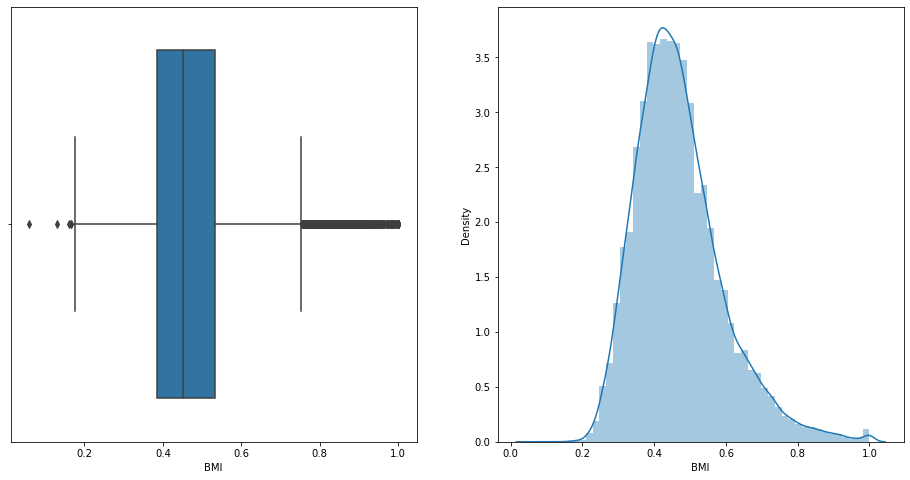

In [24]:
# BMI
box_dist('BMI')

In [37]:
mean_mode('BMI')

MEAN: 0.4693728208702357
MODE: 0    0.42878
dtype: float64


/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


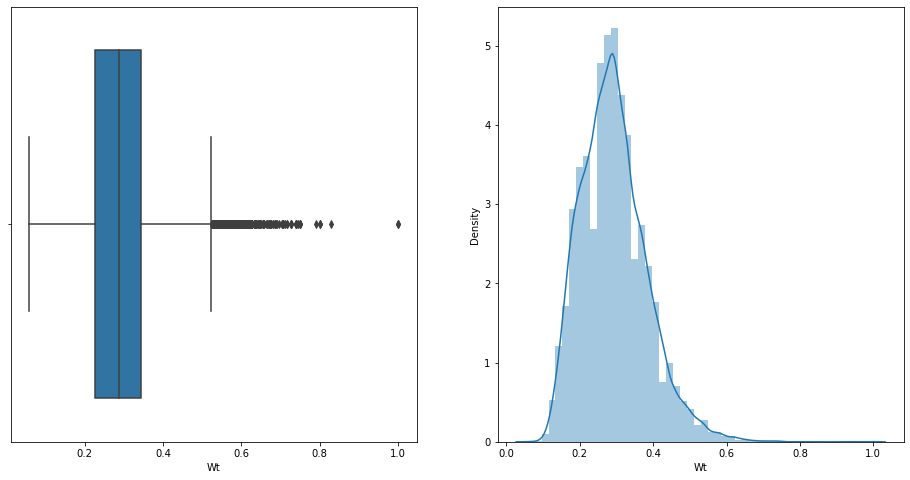

In [25]:
# Weight
box_dist('Wt')

/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


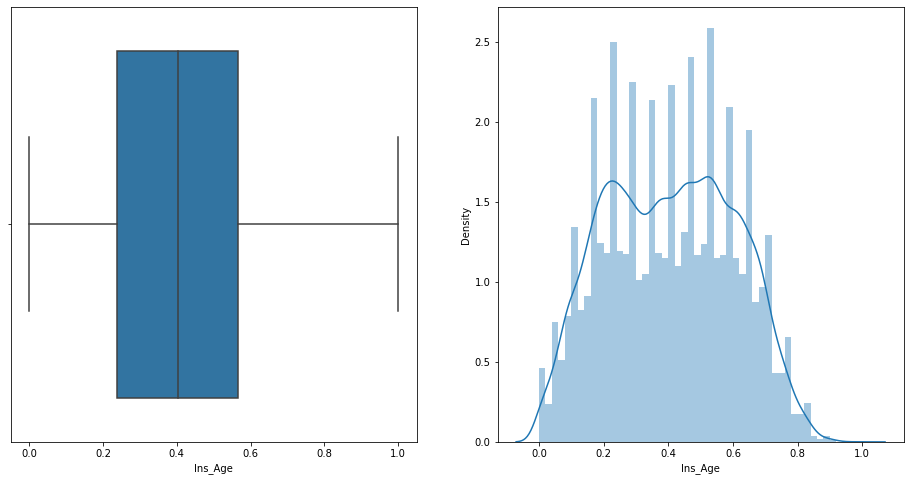

In [27]:
# Age
box_dist('Ins_Age')

/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


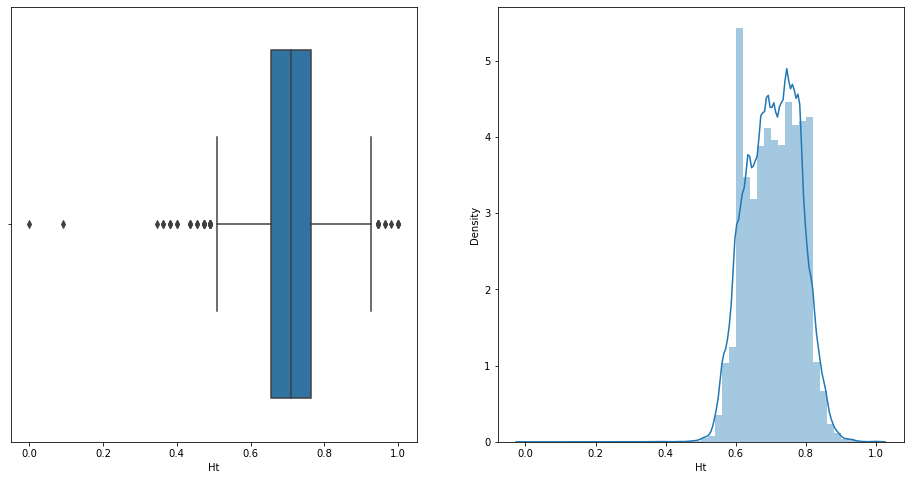

In [28]:
# Height
box_dist('Ht')

### Target Class

In [5]:
# Distribution of target class
df.Response.value_counts()

8    13574
6     7909
7     5648
2     4633
1     4327
5     3757
4     1015
3      703
Name: Response, dtype: int64

In [6]:
# Distribution of target class (ratio)
df.Response.value_counts(normalize=True)

8    0.326565
6    0.190276
7    0.135880
2    0.111461
1    0.104100
5    0.090386
4    0.024419
3    0.016913
Name: Response, dtype: float64

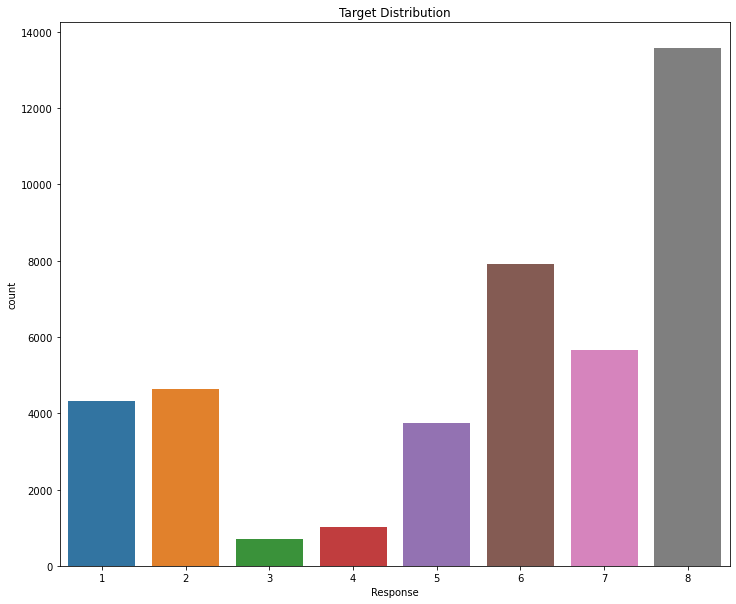

In [7]:
# Visualization
plt.figure(figsize=(12,10))
sns.countplot(x=df.Response).set_title('Target Distribution');

### Safe to assume that Class 8 represents policies/plans with least complications & minimal conditions (low risk), while the rest comes with conditions/complications (high risk)
- To further understand the relationship of features, we can consider a binary classification approach:
    - Low-risk (1): response 8
    - High-risk (0): response 1-7

In [29]:
# Confirmed no nulls or values outside of 1-8 range
df['Response'].unique()

array([8, 1, 2, 3, 5, 7, 6, 4])

In [30]:
# Created binary target column
df['target'] = (df['Response'] == 8).astype(int)

df['target']

0        1
1        1
2        1
3        1
4        1
        ..
41561    0
41562    0
41563    1
41564    1
41565    0
Name: target, Length: 41566, dtype: int64

In [31]:
# Distribution -- imbalanced
df.target.value_counts(normalize=True)

0    0.673435
1    0.326565
Name: target, dtype: float64

# Project terminated due to nature of the data not aligning with end goal